In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('business.csv')

In [3]:
df.head()

date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   
2  11-02-2022  Air India      AI       531    20:00  Delhi    24h 45m   
3  11-02-2022  Air India      AI       839    21:25  Delhi    26h 30m   
4  11-02-2022  Air India      AI       544    17:15  Delhi    06h 40m   

                                                stop arr_time      to   price  
0                                          non-stop     20:00  Mumbai  25,612  
1                                          non-stop     21:15  Mumbai  25,612  
2  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:45  Mumbai  42,220  
3  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55  Mumbai  44,450  
4  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55  Mumbai  46,690

In [4]:
df.tail()

date  airline ch_code  num_code dep_time     from time_taken  \
93482  31-03-2022  Vistara      UK       822    09:45  Chennai    10h 05m   
93483  31-03-2022  Vistara      UK       826    12:30  Chennai    10h 25m   
93484  31-03-2022  Vistara      UK       832    07:05  Chennai    13h 50m   
93485  31-03-2022  Vistara      UK       828    07:00  Chennai    10h 00m   
93486  31-03-2022  Vistara      UK       822    09:45  Chennai    10h 05m   

                                                    stop arr_time         to  \
93482  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    19:50  Hyderabad   
93483  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    22:55  Hyderabad   
93484  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:55  Hyderabad   
93485  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    17:00  Hyderabad   
93486  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    19:50  Hyderabad   

        price  
93482  69,265  
93483  77,105  
93484  79,099  
93485  81,585  
93486  81,585

In [5]:
df.describe()

num_code
count  93487.000000
mean     780.056147
std      147.616038
min      401.000000
25%      706.000000
50%      820.000000
75%      874.000000
max      996.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [7]:
# Display the unique values in the 'stop' column
print("Unique values in the 'stop' column:")
print(df['stop'].unique())

Unique values in the 'stop' column:
['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t

In [8]:
# Clean the 'stop' column
df['stop'] = df['stop'].str.replace('\n', '').str.replace('\t', '').str.strip()

# Display the unique values in the 'stop' column after cleaning
print("\nUnique values in the 'stop' column after cleaning:")
print(df['stop'].unique())


Unique values in the 'stop' column after cleaning:
['non-stop' '1-stop' '1-stopVia IDR' '1-stopVia IXU' '1-stopVia Chennai'
 '1-stopVia Lucknow' '1-stopVia STV' '1-stopVia Hyderabad' '1-stopVia GAY'
 '2+-stop' '1-stopVia Guwahati' '1-stopVia GAU' '1-stopVia VTZ'
 '1-stopVia NDC' '1-stopVia IXE' '1-stopVia Raipur' '1-stopVia PAT'
 '1-stopVia RPR' '1-stopVia Patna' '1-stopVia Kolkata' '1-stopVia HYD'
 '1-stopVia Delhi' '1-stopVia Bhubaneswar' '1-stopVia BBI'
 '1-stopVia Surat']


In [9]:
df.head()

date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   
2  11-02-2022  Air India      AI       531    20:00  Delhi    24h 45m   
3  11-02-2022  Air India      AI       839    21:25  Delhi    26h 30m   
4  11-02-2022  Air India      AI       544    17:15  Delhi    06h 40m   

       stop arr_time      to   price  
0  non-stop    20:00  Mumbai  25,612  
1  non-stop    21:15  Mumbai  25,612  
2    1-stop    20:45  Mumbai  42,220  
3    1-stop    23:55  Mumbai  44,450  
4    1-stop    23:55  Mumbai  46,690

In [10]:
df.tail()

date  airline ch_code  num_code dep_time     from time_taken  \
93482  31-03-2022  Vistara      UK       822    09:45  Chennai    10h 05m   
93483  31-03-2022  Vistara      UK       826    12:30  Chennai    10h 25m   
93484  31-03-2022  Vistara      UK       832    07:05  Chennai    13h 50m   
93485  31-03-2022  Vistara      UK       828    07:00  Chennai    10h 00m   
93486  31-03-2022  Vistara      UK       822    09:45  Chennai    10h 05m   

         stop arr_time         to   price  
93482  1-stop    19:50  Hyderabad  69,265  
93483  1-stop    22:55  Hyderabad  77,105  
93484  1-stop    20:55  Hyderabad  79,099  
93485  1-stop    17:00  Hyderabad  81,585  
93486  1-stop    19:50  Hyderabad  81,585

In [11]:
# Clean the 'price' column by removing commas and converting to integer
df['price'] = df['price'].str.replace(',', '').astype(int)

In [12]:
df.head()

date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   
2  11-02-2022  Air India      AI       531    20:00  Delhi    24h 45m   
3  11-02-2022  Air India      AI       839    21:25  Delhi    26h 30m   
4  11-02-2022  Air India      AI       544    17:15  Delhi    06h 40m   

       stop arr_time      to  price  
0  non-stop    20:00  Mumbai  25612  
1  non-stop    21:15  Mumbai  25612  
2    1-stop    20:45  Mumbai  42220  
3    1-stop    23:55  Mumbai  44450  
4    1-stop    23:55  Mumbai  46690

In [13]:
df.nunique()

date            49
airline          2
ch_code          2
num_code       264
dep_time       166
from             6
time_taken     373
stop            25
arr_time       176
to               6
price         2358
dtype: int64

In [14]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [15]:
# Convert 'time_taken' to minutes for numerical analysis
def convert_time_to_minutes(time_str):
    # Split the string into parts
    parts = time_str.split()
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    return hours * 60 + minutes

df['time_taken_minutes'] = df['time_taken'].apply(convert_time_to_minutes)

# Encode 'stop' column
stop_mapping = {
    'non-stop': 0,
    '1-stop': 1,
    '2+-stop': 2
}
df['stop_encoded'] = df['stop'].map(lambda x: stop_mapping.get(x.strip(), 1))

In [16]:
# Check the conversion result
print(df[['time_taken', 'time_taken_minutes', 'stop', 'stop_encoded']].head())

  time_taken  time_taken_minutes      stop  stop_encoded
0    02h 00m                 120  non-stop             0
1    02h 15m                 135  non-stop             0
2    24h 45m                1485    1-stop             1
3    26h 30m                1590    1-stop             1
4    06h 40m                 400    1-stop             1


In [17]:
# Select numerical columns for correlation
numeric_df = df[['time_taken_minutes', 'price', 'stop_encoded']]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

In [18]:
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    time_taken_minutes     price  stop_encoded
time_taken_minutes            1.000000  0.242729      0.478045
price                         0.242729  1.000000      0.593847
stop_encoded                  0.478045  0.593847      1.000000


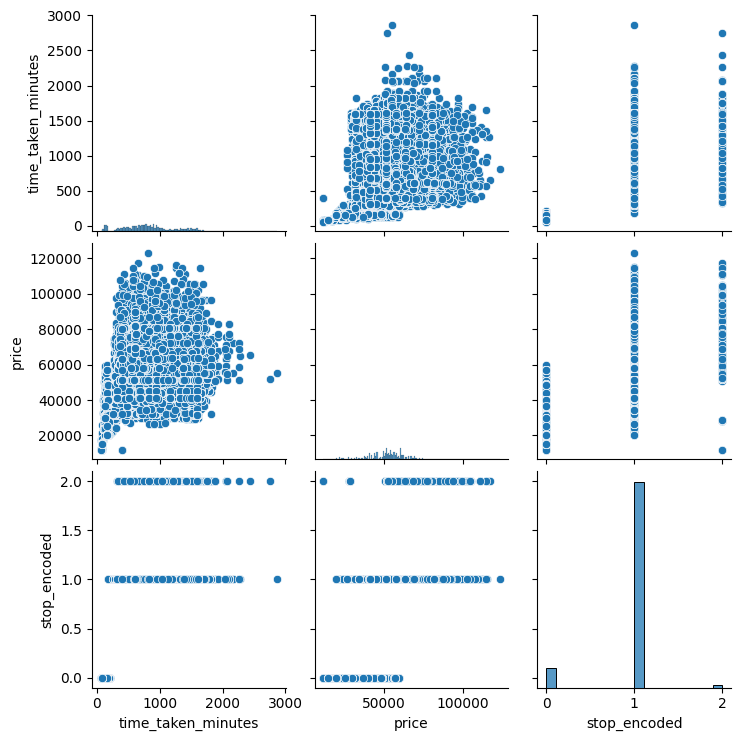

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for visualizing relationships
sns.pairplot(numeric_df)
plt.show()

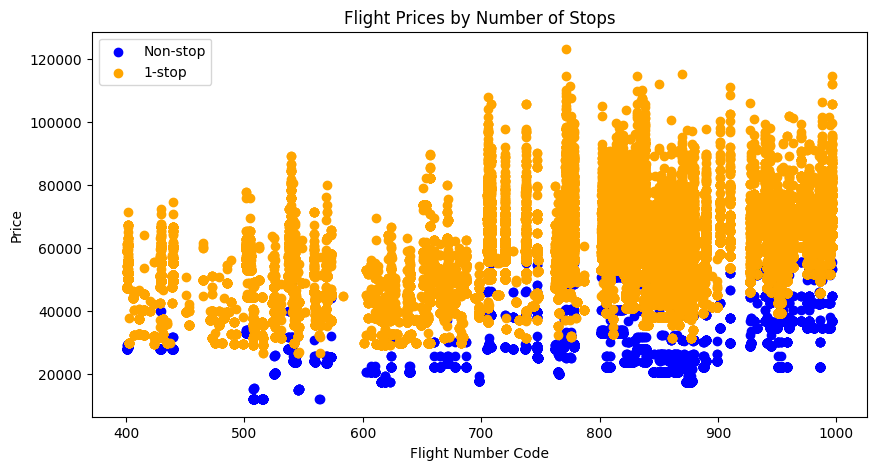

In [20]:
# Filter based on the number of stops
non_stop_flights = df[df['stop'] == 'non-stop']
one_stop_flights = df[df['stop'] == '1-stop']

# Plot the prices
plt.figure(figsize=(10, 5))

# Plot non-stop flight prices
plt.scatter(non_stop_flights['num_code'], non_stop_flights['price'], color='blue', label='Non-stop')
# Plot 1-stop flight prices
plt.scatter(one_stop_flights['num_code'], one_stop_flights['price'], color='orange', label='1-stop')

plt.title('Flight Prices by Number of Stops')
plt.xlabel('Flight Number Code')
plt.ylabel('Price')
plt.legend()

plt.show()

In [21]:
df.head()

date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   
2  11-02-2022  Air India      AI       531    20:00  Delhi    24h 45m   
3  11-02-2022  Air India      AI       839    21:25  Delhi    26h 30m   
4  11-02-2022  Air India      AI       544    17:15  Delhi    06h 40m   

       stop arr_time      to  price  time_taken_minutes  stop_encoded  
0  non-stop    20:00  Mumbai  25612                 120             0  
1  non-stop    21:15  Mumbai  25612                 135             0  
2    1-stop    20:45  Mumbai  42220                1485             1  
3    1-stop    23:55  Mumbai  44450                1590             1  
4    1-stop    23:55  Mumbai  46690                 400             1

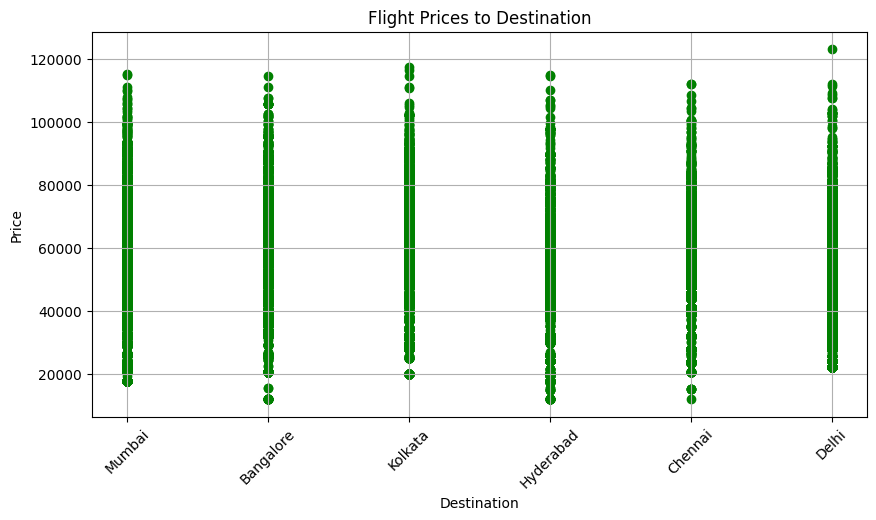

In [22]:
# Plot the prices
plt.figure(figsize=(10, 5))

# Scatter plot for destination vs price
plt.scatter(df['to'], df['price'], color='green')

plt.title('Flight Prices to Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [23]:
# Sort the DataFrame by price in descending order
sorted_df = df.sort_values(by='price', ascending=False)

# Print the top 10 rows of the sorted DataFrame
print(sorted_df.head(10))

             date  airline ch_code  num_code dep_time       from time_taken  \
54711  13-02-2022  Vistara      UK       772    10:25    Kolkata    13h 30m   
9430   15-02-2022  Vistara      UK       811    05:55      Delhi    10h 55m   
9193   11-02-2022  Vistara      UK       809    19:50      Delhi    21h 05m   
70679  13-02-2022  Vistara      UK       870    20:35  Hyderabad    16h 25m   
64333  27-02-2022  Vistara      UK       772    10:25    Kolkata    09h 30m   
83902  15-02-2022  Vistara      UK       832    06:55    Chennai    15h 05m   
23426  12-02-2022  Vistara      UK       996    18:30     Mumbai    22h 30m   
12517  12-02-2022  Vistara      UK       707    17:30      Delhi    27h 25m   
9192   11-02-2022  Vistara      UK       809    19:50      Delhi    21h 05m   
34882  12-02-2022  Vistara      UK       996    18:30     Mumbai    21h 50m   

          stop arr_time         to   price  time_taken_minutes  stop_encoded  
54711   1-stop    23:55      Delhi  123071         

In [24]:
# Remove the 'stop' column from the DataFrame
df = df.drop(columns=['stop'])

In [25]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['ch_code', 'num_code', 'time_taken']
df = df.drop(columns=columns_to_drop)

# Print the DataFrame to confirm the columns are removed
print(df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [26]:
df.head()

date    airline dep_time   from arr_time      to  price  \
0  11-02-2022  Air India    18:00  Delhi    20:00  Mumbai  25612   
1  11-02-2022  Air India    19:00  Delhi    21:15  Mumbai  25612   
2  11-02-2022  Air India    20:00  Delhi    20:45  Mumbai  42220   
3  11-02-2022  Air India    21:25  Delhi    23:55  Mumbai  44450   
4  11-02-2022  Air India    17:15  Delhi    23:55  Mumbai  46690   

   time_taken_minutes  stop_encoded  
0                 120             0  
1                 135             0  
2                1485             1  
3                1590             1  
4                 400             1

C:\Users\HP\AppData\Local\Temp\ipykernel_11904\3567049284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='price', data=airline_prices, palette='viridis')


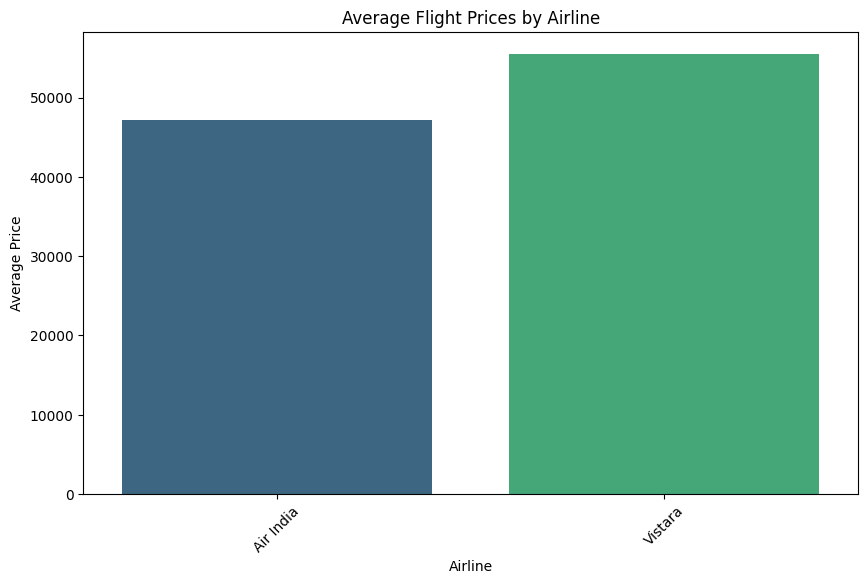

In [27]:
# Group by 'airline' and calculate the mean price
airline_prices = df.groupby('airline')['price'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=airline_prices, palette='viridis')

plt.title('Average Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

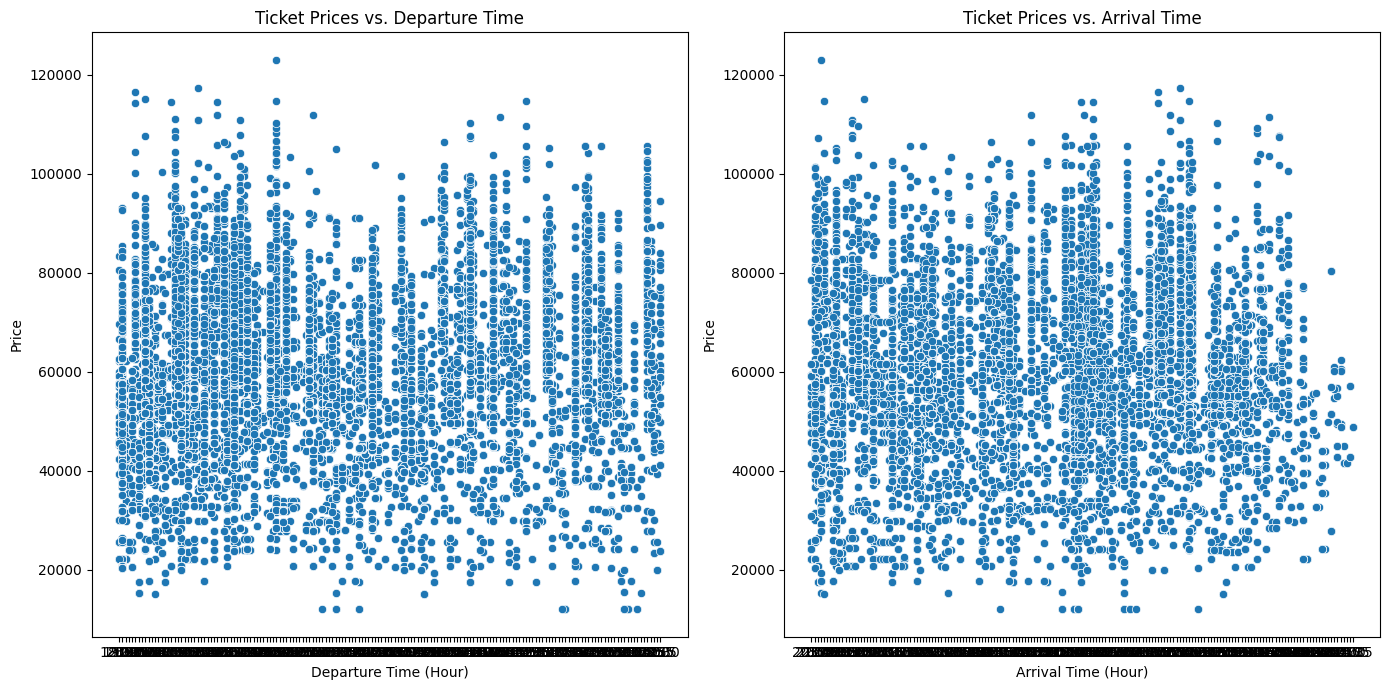

In [28]:
# Plot the relationship between departure time and price
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='dep_time', y='price', data=df)
plt.title('Ticket Prices vs. Departure Time')
plt.xlabel('Departure Time (Hour)')
plt.ylabel('Price')

# Plot the relationship between arrival time and price
plt.subplot(1, 2, 2)
sns.scatterplot(x='arr_time', y='price', data=df)
plt.title('Ticket Prices vs. Arrival Time')
plt.xlabel('Arrival Time (Hour)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

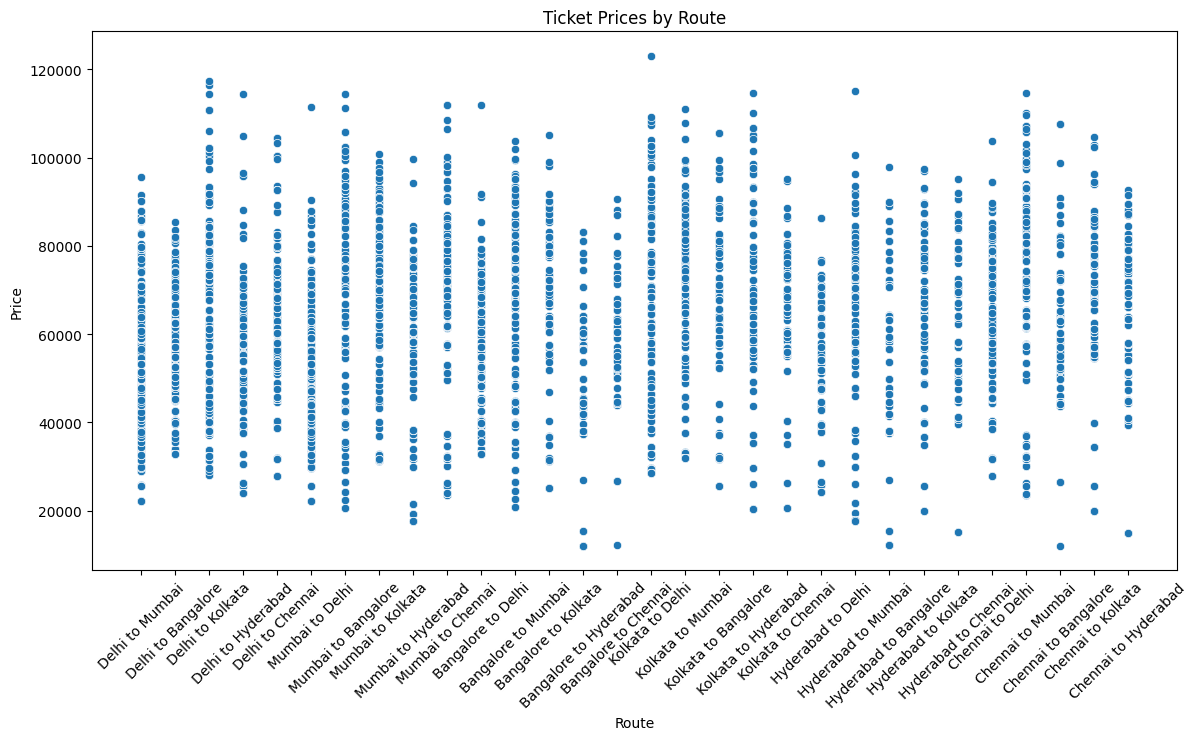

In [29]:
# Concatenate "from" and "to" columns into a single column for the x-axis
df['route'] = df['from'] + ' to ' + df['to']

# Plot the results
plt.figure(figsize=(14, 7))
sns.scatterplot(x='route', y='price', data=df)
plt.title('Ticket Prices by Route')
plt.xlabel('Route')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

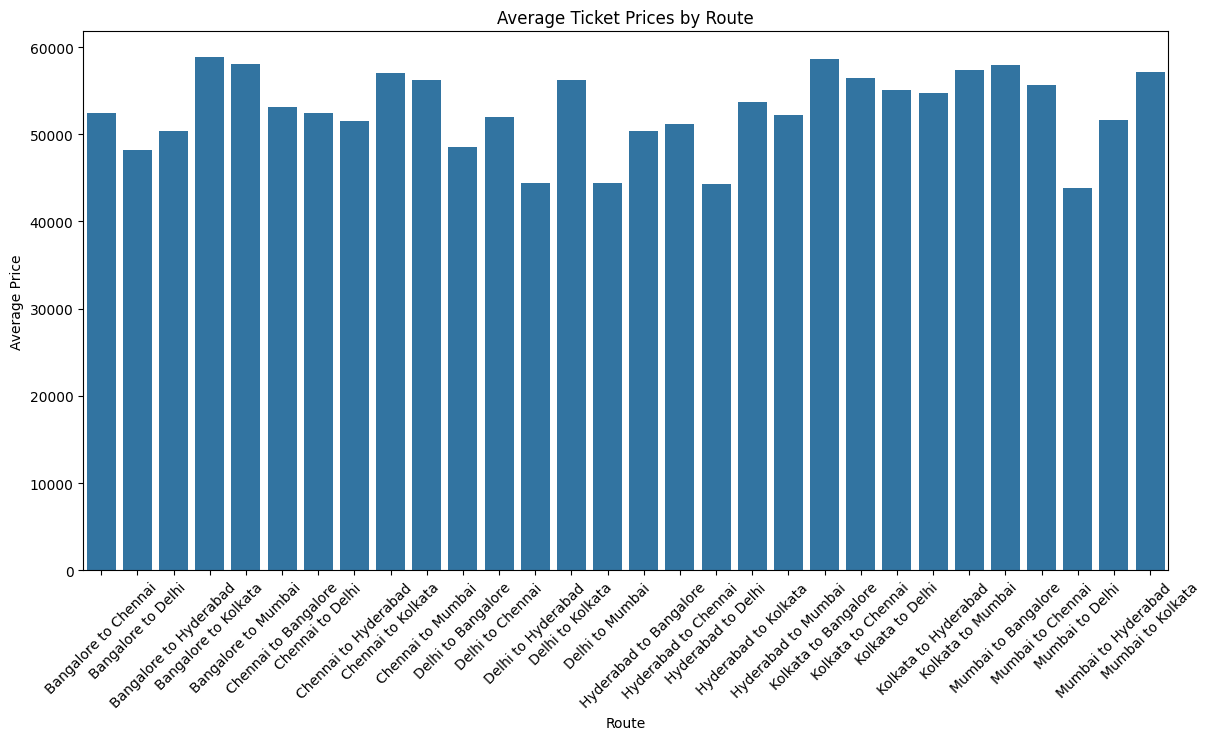

In [30]:
# Group by route and calculate the average price
route_avg_price = df.groupby('route')['price'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 7))

sns.barplot(x='route', y='price', data=route_avg_price)
plt.title('Average Ticket Prices by Route')
plt.xlabel('Route')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
plt.show()

In [31]:
df.head()

date    airline dep_time   from arr_time      to  price  \
0  11-02-2022  Air India    18:00  Delhi    20:00  Mumbai  25612   
1  11-02-2022  Air India    19:00  Delhi    21:15  Mumbai  25612   
2  11-02-2022  Air India    20:00  Delhi    20:45  Mumbai  42220   
3  11-02-2022  Air India    21:25  Delhi    23:55  Mumbai  44450   
4  11-02-2022  Air India    17:15  Delhi    23:55  Mumbai  46690   

   time_taken_minutes  stop_encoded            route  
0                 120             0  Delhi to Mumbai  
1                 135             0  Delhi to Mumbai  
2                1485             1  Delhi to Mumbai  
3                1590             1  Delhi to Mumbai  
4                 400             1  Delhi to Mumbai

In [32]:
# Convert dep_time and arr_time to datetime format
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.time
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M').dt.time

# Convert time_taken_minutes to int format
df['time_taken_minutes'] = df['time_taken_minutes'].astype(int)

In [33]:
df.head()

date    airline  dep_time   from  arr_time      to  price  \
0  11-02-2022  Air India  18:00:00  Delhi  20:00:00  Mumbai  25612   
1  11-02-2022  Air India  19:00:00  Delhi  21:15:00  Mumbai  25612   
2  11-02-2022  Air India  20:00:00  Delhi  20:45:00  Mumbai  42220   
3  11-02-2022  Air India  21:25:00  Delhi  23:55:00  Mumbai  44450   
4  11-02-2022  Air India  17:15:00  Delhi  23:55:00  Mumbai  46690   

   time_taken_minutes  stop_encoded            route  
0                 120             0  Delhi to Mumbai  
1                 135             0  Delhi to Mumbai  
2                1485             1  Delhi to Mumbai  
3                1590             1  Delhi to Mumbai  
4                 400             1  Delhi to Mumbai

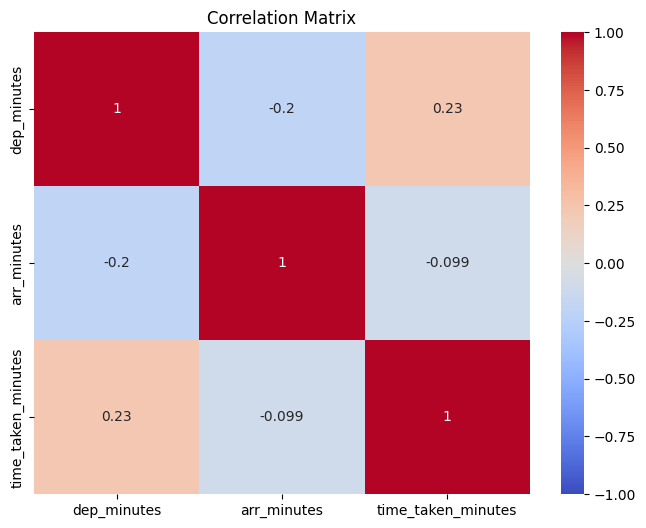

In [34]:
# Convert dep_time and arr_time to total minutes since midnight
df['dep_minutes'] = df['dep_time'].apply(lambda x: x.hour * 60 + x.minute)
df['arr_minutes'] = df['arr_time'].apply(lambda x: x.hour * 60 + x.minute)

# Select relevant columns including the new converted ones
cols = ['dep_minutes', 'arr_minutes', 'time_taken_minutes']

# Calculate the correlation matrix
correlation_matrix = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [35]:
df.head()

date    airline  dep_time   from  arr_time      to  price  \
0  11-02-2022  Air India  18:00:00  Delhi  20:00:00  Mumbai  25612   
1  11-02-2022  Air India  19:00:00  Delhi  21:15:00  Mumbai  25612   
2  11-02-2022  Air India  20:00:00  Delhi  20:45:00  Mumbai  42220   
3  11-02-2022  Air India  21:25:00  Delhi  23:55:00  Mumbai  44450   
4  11-02-2022  Air India  17:15:00  Delhi  23:55:00  Mumbai  46690   

   time_taken_minutes  stop_encoded            route  dep_minutes  arr_minutes  
0                 120             0  Delhi to Mumbai         1080         1200  
1                 135             0  Delhi to Mumbai         1140         1275  
2                1485             1  Delhi to Mumbai         1200         1245  
3                1590             1  Delhi to Mumbai         1285         1435  
4                 400             1  Delhi to Mumbai         1035         1435

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column for the intercept
X = df[cols]
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif_data)

              feature        VIF
0               const  22.312657
1         dep_minutes   1.092589
2         arr_minutes   1.044695
3  time_taken_minutes   1.059479


price
Skew : -0.1


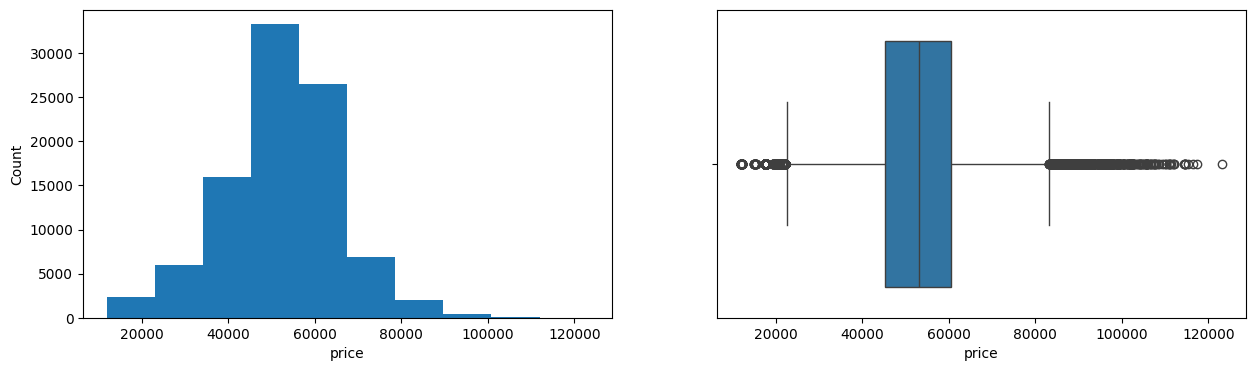

time_taken_minutes
Skew : 0.27


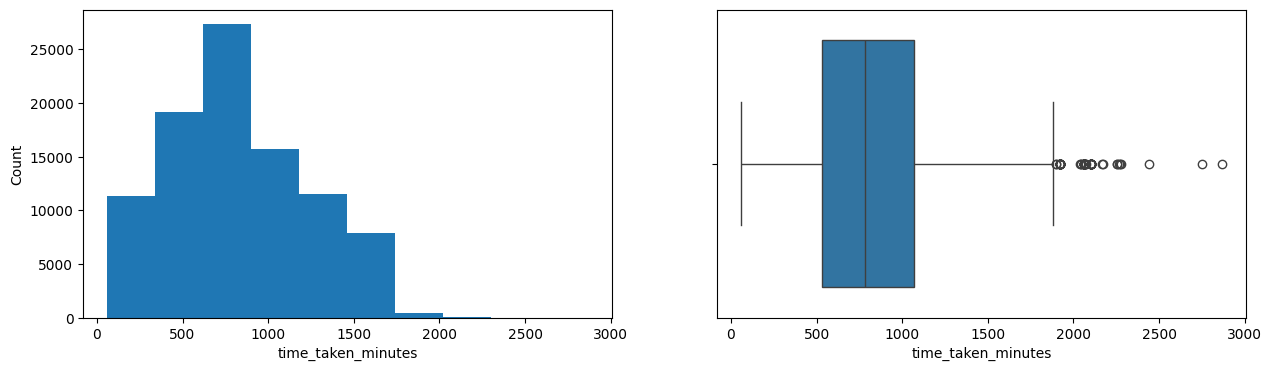

stop_encoded
Skew : -1.91


dep_minutes
Skew : 0.05


arr_minutes
Skew : -0.53


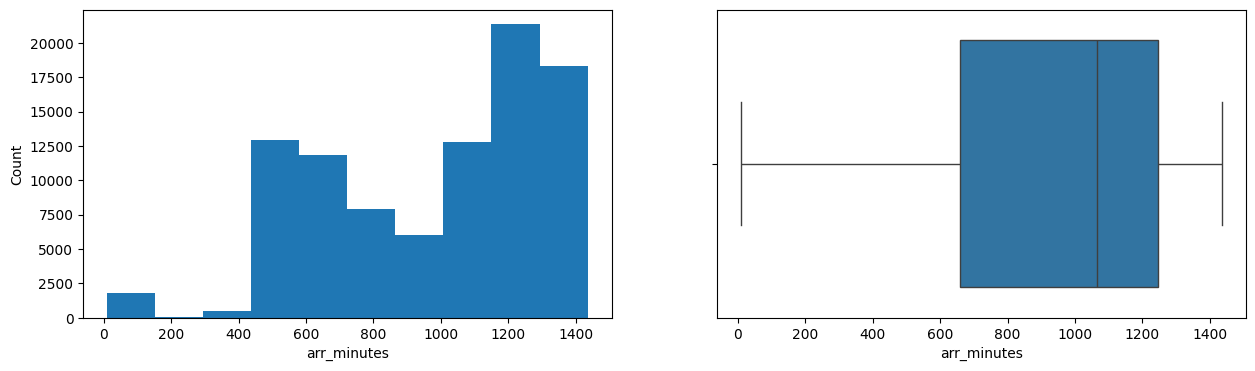

In [37]:
# Iterate through numerical columns
for col in df.select_dtypes(include=['number']).columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col])
    plt.ylabel('Count')
    plt.xlabel(col)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    
    plt.show()

In [38]:
# Get DataFrame with only numericl columns
numerical_df = df.select_dtypes(include=['number'])

# Display the DataFrame with numerical columns
print(numerical_df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     airline  stop_encoded         price
0  Air India             0  25992.461538
1  Air India             1  49727.250000
2  Air India             2  62167.692308
3    Vistara             0  28839.885246
4    Vistara             1  57050.906250
5    Vistara             2  72971.149425


<Figure size 1200x600 with 0 Axes>

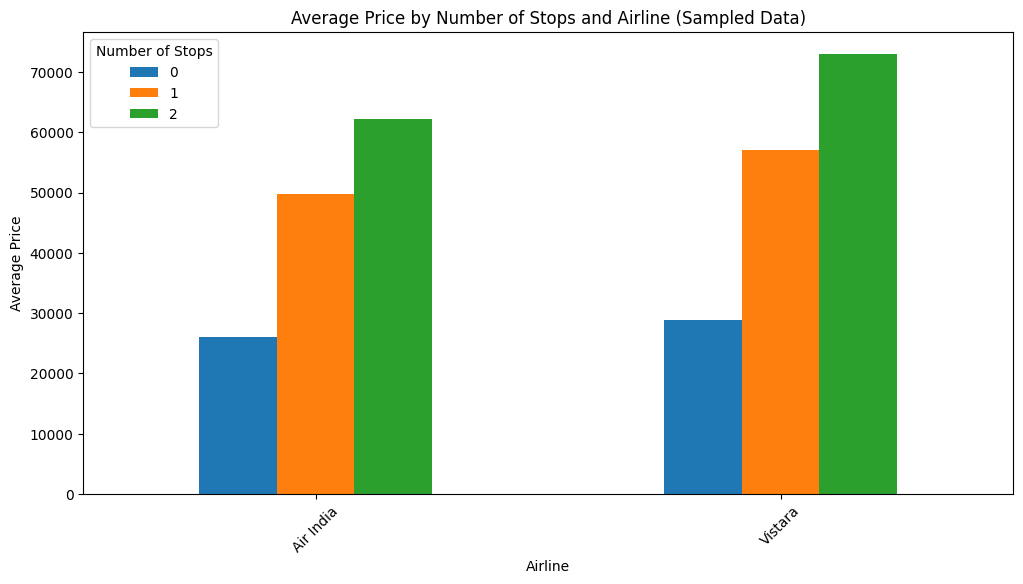

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
random_seed = 42

# Sample 100 values of each stop_encoded category
sample_0s = df[df['stop_encoded'] == 0].sample(n=100, random_state=random_seed)
sample_1s = df[df['stop_encoded'] == 1].sample(n=100, random_state=random_seed)
sample_2s = df[df['stop_encoded'] == 2].sample(n=100, random_state=random_seed)

# Combine the samples into a single DataFrame
sampled_df = pd.concat([sample_0s, sample_1s, sample_2s])

# Calculate the average price grouped by airline and stop_encoded
avg_price = sampled_df.groupby(['airline', 'stop_encoded'])['price'].mean().reset_index()

# Print the DataFrame with the average prices
print(avg_price)

# Pivot the data to make it suitable for plotting
avg_price_pivot = avg_price.pivot(index='airline', columns='stop_encoded', values='price')

# Plot the average prices using a bar plot
plt.figure(figsize=(12, 6))
avg_price_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Number of Stops and Airline (Sampled Data)')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Number of Stops')
plt.show()

In [40]:
# Count the occurrences of each unique value in the stop_encoded column
stop_counts = df['stop_encoded'].value_counts()

# Print the counts
print(stop_counts)

stop_encoded
1    84302
0     8102
2     1083
Name: count, dtype: int64


In [41]:
from scipy.stats import zscore

# Assuming `df` is your dataframe
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for each numerical column
z_scores = np.abs(df[numerical_cols].apply(zscore))

# Define a threshold for Z-score to identify outliers (e.g., Z-score > 3)
threshold = 3

# Detect outliers
outliers = (z_scores > threshold).any(axis=1)

# Print the number of outliers detected
print(f'Number of outliers detected: {outliers.sum()}')

# Display the rows identified as outliers
outlier_rows = df[outliers]
print(outlier_rows)

Number of outliers detected: 9524
             date    airline  dep_time       from  arr_time         to  \
0      11-02-2022  Air India  18:00:00      Delhi  20:00:00     Mumbai   
1      11-02-2022  Air India  19:00:00      Delhi  21:15:00     Mumbai   
5      11-02-2022    Vistara  19:50:00      Delhi  22:00:00     Mumbai   
9      11-02-2022    Vistara  19:00:00      Delhi  21:15:00     Mumbai   
34     12-02-2022    Vistara  20:40:00      Delhi  22:50:00     Mumbai   
35     12-02-2022  Air India  18:00:00      Delhi  20:00:00     Mumbai   
36     12-02-2022  Air India  07:00:00      Delhi  09:05:00     Mumbai   
37     12-02-2022  Air India  08:00:00      Delhi  10:10:00     Mumbai   
38     12-02-2022  Air India  20:00:00      Delhi  22:10:00     Mumbai   
39     12-02-2022  Air India  09:00:00      Delhi  11:15:00     Mumbai   
40     12-02-2022  Air India  19:00:00      Delhi  21:15:00     Mumbai   
47     12-02-2022    Vistara  19:00:00      Delhi  21:15:00     Mumbai   
48  

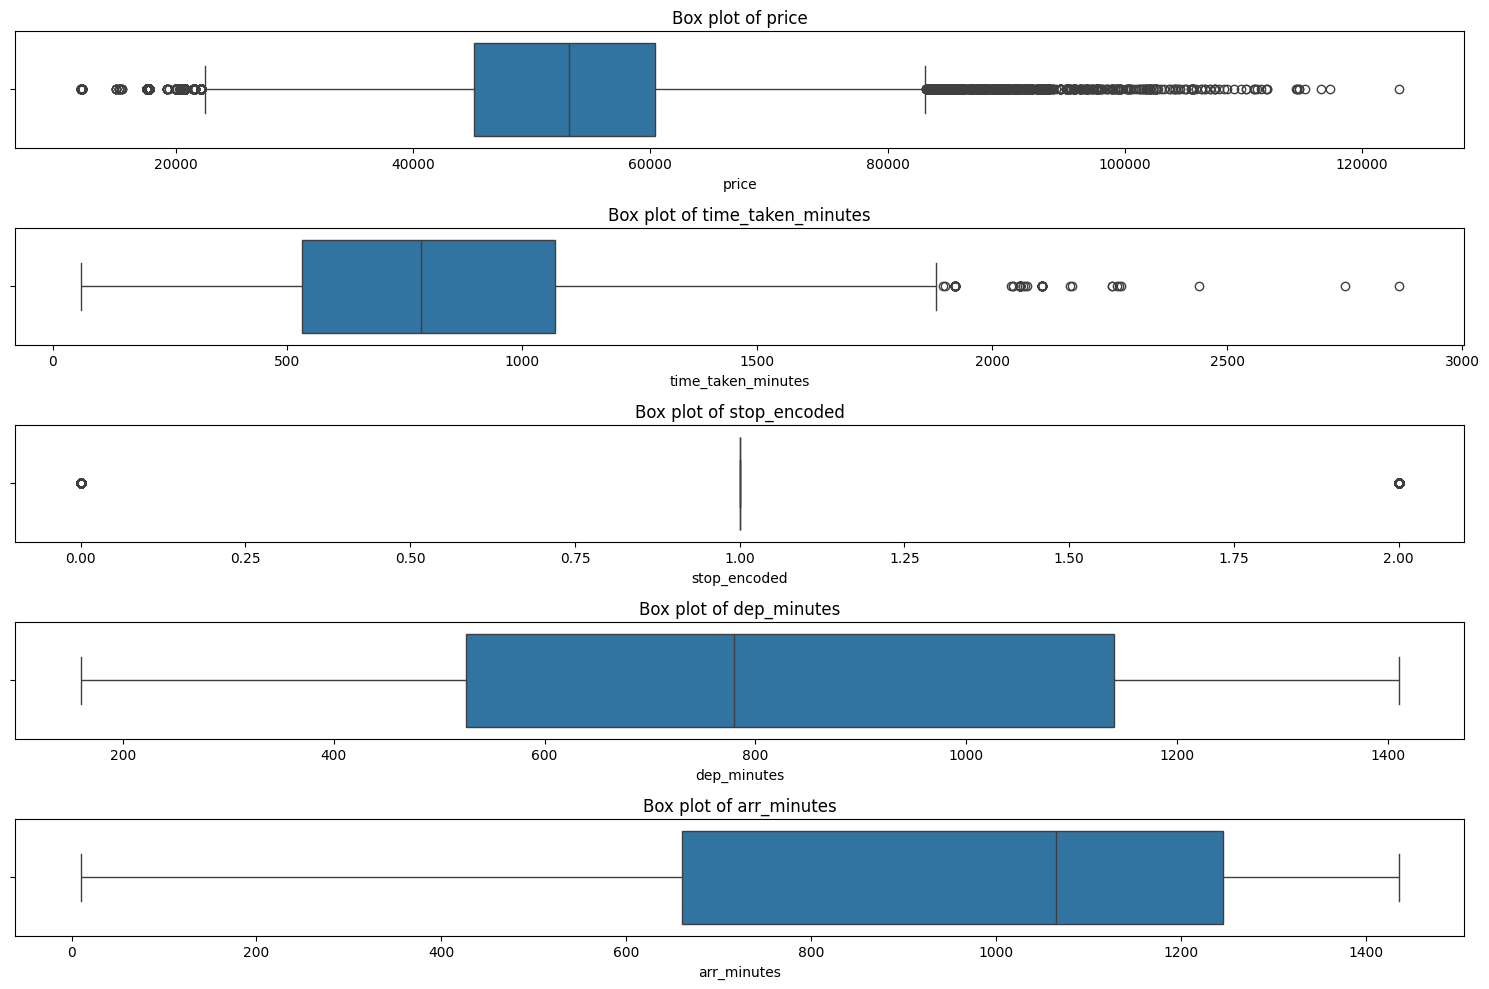

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Sample dataset for demonstration (replace this with your actual dataframe)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to read your actual dataset

# Assuming `df` is your dataframe
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for each numerical column
z_scores = np.abs(df[numerical_cols].apply(zscore))

# Define a threshold for Z-score to identify outliers (e.g., Z-score > 3)
threshold = 3

# Detect outliers
outliers = (z_scores > threshold).any(axis=1)

# Box plot to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Sample dataset for demonstration (replace this with your actual dataframe)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to read your actual dataset

# Assuming `df` is your dataframe
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Function to detect outliers using Z-score
def detect_outliers(df, column, threshold=3):
    z_scores = zscore(df[column])
    outliers = np.abs(z_scores) > threshold
    return outliers

# Dictionary to store outliers for each column
outliers_dict = {}
for col in numerical_cols:
    outliers_dict[col] = detect_outliers(df, col)
    print(f'Number of outliers in {col}: {outliers_dict[col].sum()}')

# Combine outliers into a single DataFrame
outliers_df = pd.DataFrame(outliers_dict)

Number of outliers in price: 431
Number of outliers in time_taken_minutes: 60
Number of outliers in stop_encoded: 9185
Number of outliers in dep_minutes: 0
Number of outliers in arr_minutes: 0


In [44]:
print(numerical_cols)

Index(['price', 'time_taken_minutes', 'stop_encoded', 'dep_minutes',
       'arr_minutes'],
      dtype='object')


Skewness of time_taken_minutes after imputation: 0.27


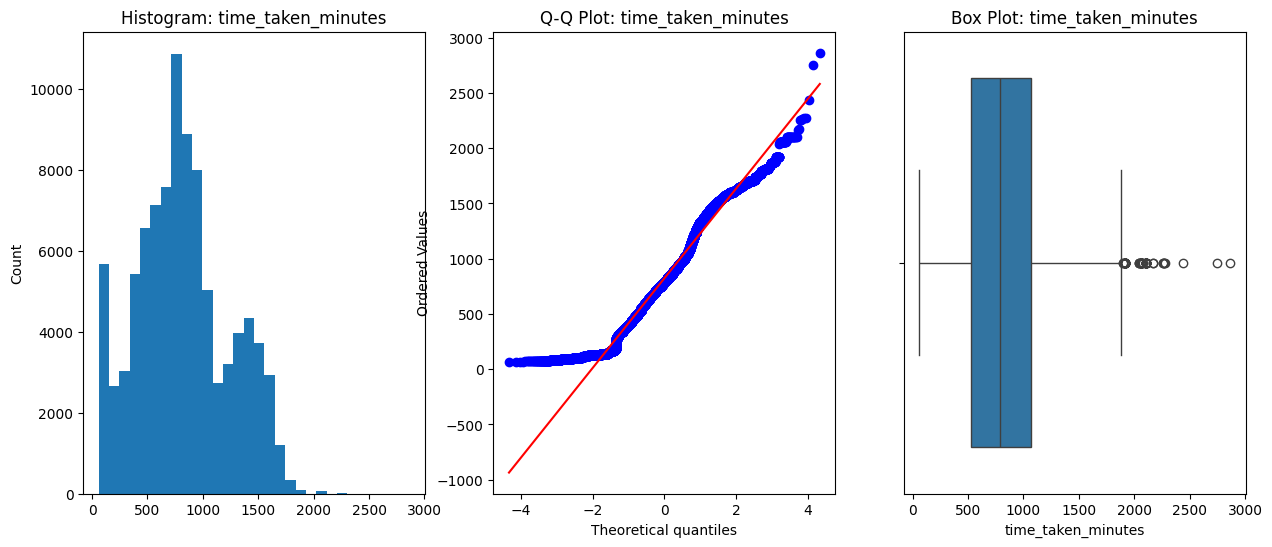

Skewness of stop_encoded after imputation: -1.91


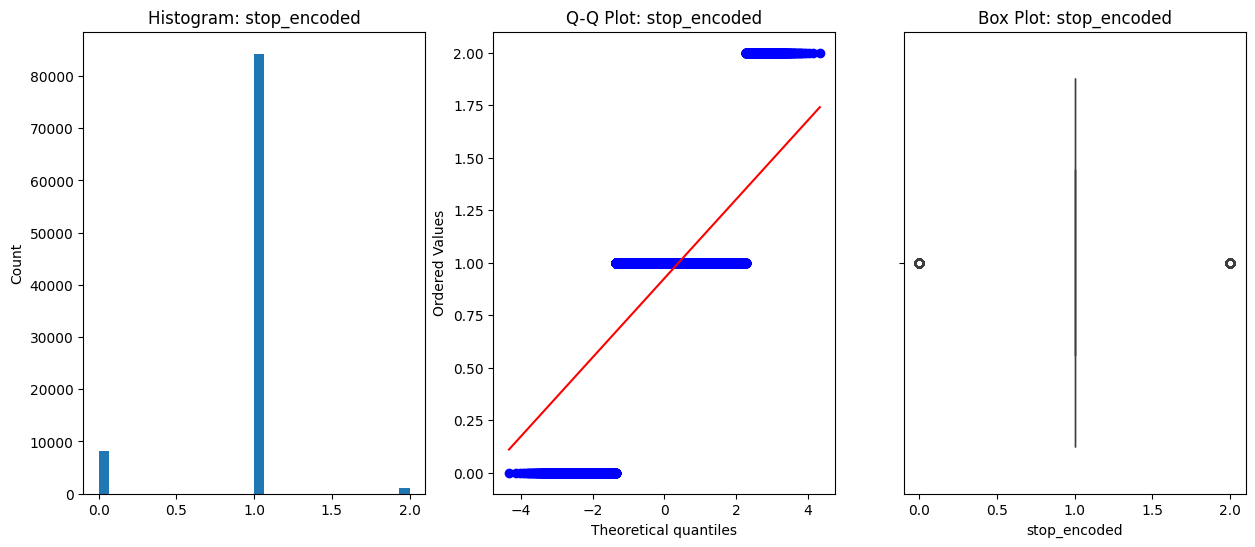

In [45]:
from scipy.stats import shapiro, kstest, norm, probplot

# Check and Print Skewness
for col in ['time_taken_minutes', 'stop_encoded']:
    skewness = df[col].skew()
    print(f'Skewness of {col} after imputation: {skewness:.2f}')

    # Visualize the data with histograms and Q-Q plots
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 3, 1)
    df[col].hist(grid=False, bins=30)
    plt.title(f'Histogram: {col}')
    plt.ylabel('Count')

    plt.subplot(1, 3, 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot: {col}')

    plt.show()

In [46]:
df['from'].nunique()

6

In [47]:
df['to'].nunique()

6

In [48]:
df.head()

date    airline  dep_time   from  arr_time      to  price  \
0  11-02-2022  Air India  18:00:00  Delhi  20:00:00  Mumbai  25612   
1  11-02-2022  Air India  19:00:00  Delhi  21:15:00  Mumbai  25612   
2  11-02-2022  Air India  20:00:00  Delhi  20:45:00  Mumbai  42220   
3  11-02-2022  Air India  21:25:00  Delhi  23:55:00  Mumbai  44450   
4  11-02-2022  Air India  17:15:00  Delhi  23:55:00  Mumbai  46690   

   time_taken_minutes  stop_encoded            route  dep_minutes  arr_minutes  
0                 120             0  Delhi to Mumbai         1080         1200  
1                 135             0  Delhi to Mumbai         1140         1275  
2                1485             1  Delhi to Mumbai         1200         1245  
3                1590             1  Delhi to Mumbai         1285         1435  
4                 400             1  Delhi to Mumbai         1035         1435

In [49]:
# Perform one-hot encoding on 'from' and 'to' columns
df = pd.get_dummies(df, columns=['from', 'to'], dtype=int)

In [50]:
df.tail(100)

date    airline  dep_time  arr_time  price  time_taken_minutes  \
93387  29-03-2022  Air India  09:55:00  23:35:00  51345                 820   
93388  29-03-2022  Air India  17:00:00  09:00:00  51345                 960   
93389  29-03-2022  Air India  06:10:00  23:35:00  51345                1045   
93390  29-03-2022  Air India  17:00:00  11:55:00  51345                1135   
93391  29-03-2022  Air India  09:55:00  09:00:00  51345                1385   
93392  29-03-2022  Air India  06:10:00  09:00:00  51345                1610   
93393  29-03-2022  Air India  06:20:00  23:35:00  68739                1035   
93394  29-03-2022    Vistara  09:45:00  19:50:00  69265                 605   
93395  29-03-2022    Vistara  12:30:00  22:55:00  77105                 625   
93396  29-03-2022    Vistara  17:25:00  09:25:00  80544                 960   
93397  29-03-2022    Vistara  17:25:00  12:35:00  80544                1150   
93398  29-03-2022    Vistara  17:25:00  17:00:00  80544                1415   
93399  29-03-2022    Vistara  17:25:00  19:50:00  80544                1585   
93400  29-03-2022    Vistara  09:45:00  19:50:00  81585                 605   
93401  29-03-2022    Vistara  07:05:00  20:55:00  87051                 830   
93402  29-03-2022    Vistara  07:00:00  17:00:00  89537                 600   
93403  30-03-2022  Air India  20:40:00  22:00:00  15000                  80   
93404  30-03-2022  Air India  11:20:00  21:15:00  39432                 595   
93405  30-03-2022  Air India  14:55:00  20:45:00  40593                 350   
93406  30-03-2022  Air India  14:55:00  22:25:00  40593                 450   
93407  30-03-2022  Air India  14:55:00  07:15:00  40593                 980   
93408  30-03-2022    Vistara  07:00:00  12:15:00  41064                 315   
93409  30-03-2022    Vistara  12:30:00  20:55:00  41064                 505   
93410  30-03-2022    Vistara  09:45:00  20:55:00  41064                 670   
93411  30-03-2022    Vistara  20:30:00  07:50:00  41064                 680   
93412  30-03-2022    Vistara  07:00:00  20:55:00  41064                 835   
93413  30-03-2022    Vistara  20:30:00  12:15:00  41064                 945   
93414  30-03-2022    Vistara  12:30:00  07:50:00  41064                1160   
93415  30-03-2022    Vistara  09:45:00  07:50:00  41064                1325   
93416  30-03-2022    Vistara  12:30:00  12:15:00  41064                1425   
93417  30-03-2022    Vistara  20:30:00  20:55:00  41064                1465   
93418  30-03-2022    Vistara  07:00:00  07:50:00  41064                1490   
93419  30-03-2022    Vistara  09:45:00  12:15:00  41064                1590   
93420  30-03-2022    Vistara  07:05:00  17:00:00  51457                 595   
93421  30-03-2022    Vistara  07:05:00  19:50:00  51457                 765   
93422  30-03-2022    Vistara  21:05:00  12:35:00  51457                 930   
93423  30-03-2022    Vistara  07:05:00  22:55:00  51457                 950   
93424  30-03-2022    Vistara  21:05:00  17:00:00  51457                1195   
93425  30-03-2022    Vistara  21:05:00  19:50:00  51457                1365   
93426  30-03-2022    Vistara  21:05:00  22:55:00  51457                1550   
93427  30-03-2022  Air India  17:00:00  23:35:00  51345                 395   
93428  30-03-2022  Air India  09:55:00  23:35:00  51345                 820   
93429  30-03-2022  Air India  17:00:00  09:00:00  51345                 960   
93430  30-03-2022  Air India  06:10:00  23:35:00  51345                1045   
93431  30-03-2022  Air India  17:00:00  11:55:00  51345                1135   
93432  30-03-2022  Air India  09:55:00  09:00:00  51345                1385   
93433  30-03-2022  Air India  06:10:00  09:00:00  51345                1610   
93434  30-03-2022    Vistara  21:05:00  09:25:00  58032                 740   
93435  30-03-2022    Vistara  07:05:00  09:25:00  58032                1580   
93436  30-03-2022    Vistara  09:45:00  19:50:00  69265        

In [51]:
# Filter the DataFrame where stop_encoded is 0
df_stop_0 = df[df['stop_encoded'] == 0]

# Display the resulting DataFrame
print(df_stop_0)

             date    airline  dep_time  arr_time  price  time_taken_minutes  \
0      11-02-2022  Air India  18:00:00  20:00:00  25612                 120   
1      11-02-2022  Air India  19:00:00  21:15:00  25612                 135   
5      11-02-2022    Vistara  19:50:00  22:00:00  50264                 130   
9      11-02-2022    Vistara  19:00:00  21:15:00  53288                 135   
34     12-02-2022    Vistara  20:40:00  22:50:00  25736                 130   
35     12-02-2022  Air India  18:00:00  20:00:00  25612                 120   
36     12-02-2022  Air India  07:00:00  09:05:00  25612                 125   
37     12-02-2022  Air India  08:00:00  10:10:00  25612                 130   
38     12-02-2022  Air India  20:00:00  22:10:00  25612                 130   
39     12-02-2022  Air India  09:00:00  11:15:00  25612                 135   
40     12-02-2022  Air India  19:00:00  21:15:00  25612                 135   
47     12-02-2022    Vistara  19:00:00  21:15:00  40

In [52]:
df.head()

date    airline  dep_time  arr_time  price  time_taken_minutes  \
0  11-02-2022  Air India  18:00:00  20:00:00  25612                 120   
1  11-02-2022  Air India  19:00:00  21:15:00  25612                 135   
2  11-02-2022  Air India  20:00:00  20:45:00  42220                1485   
3  11-02-2022  Air India  21:25:00  23:55:00  44450                1590   
4  11-02-2022  Air India  17:15:00  23:55:00  46690                 400   

   stop_encoded            route  dep_minutes  arr_minutes  from_Bangalore  \
0             0  Delhi to Mumbai         1080         1200               0   
1             0  Delhi to Mumbai         1140         1275               0   
2             1  Delhi to Mumbai         1200         1245               0   
3             1  Delhi to Mumbai         1285         1435               0   
4             1  Delhi to Mumbai         1035         1435               0   

   from_Chennai  from_Delhi  from_Hyderabad  from_Kolkata  from_Mumbai  \
0             0           1               0             0            0   
1             0           1               0             0            0   
2             0           1               0             0            0   
3             0           1               0             0            0   
4             0           1               0             0            0   

   to_Bangalore  to_Chennai  to_Delhi  to_Hyderabad  to_Kolkata  to_Mumbai  
0             0           0         0             0           0          1  
1             0           0         0             0           0          1  
2             0           0         0             0           0          1  
3             0           0         0             0           0          1  
4             0           0         0             0           0          1

In [53]:
# Drop the 'date' and 'route' columns
df.drop(columns=['date', 'route','dep_time','arr_time'], inplace=True)

In [54]:
df.head()

airline  price  time_taken_minutes  stop_encoded  dep_minutes  \
0  Air India  25612                 120             0         1080   
1  Air India  25612                 135             0         1140   
2  Air India  42220                1485             1         1200   
3  Air India  44450                1590             1         1285   
4  Air India  46690                 400             1         1035   

   arr_minutes  from_Bangalore  from_Chennai  from_Delhi  from_Hyderabad  \
0         1200               0             0           1               0   
1         1275               0             0           1               0   
2         1245               0             0           1               0   
3         1435               0             0           1               0   
4         1435               0             0           1               0   

   from_Kolkata  from_Mumbai  to_Bangalore  to_Chennai  to_Delhi  \
0             0            0             0           0         0   
1             0            0             0           0         0   
2             0            0             0           0         0   
3             0            0             0           0         0   
4             0            0             0           0         0   

   to_Hyderabad  to_Kolkata  to_Mumbai  
0             0           0          1  
1             0           0          1  
2             0           0          1  
3             0           0          1  
4             0           0          1

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'airline' column
df['airline_encoded'] = label_encoder.fit_transform(df['airline'])

# Display the encoded values
print(df[['airline', 'airline_encoded']].head())

     airline  airline_encoded
0  Air India                0
1  Air India                0
2  Air India                0
3  Air India                0
4  Air India                0


In [56]:
df.drop(columns=['airline'], inplace=True)

In [57]:
df.tail()

price  time_taken_minutes  stop_encoded  dep_minutes  arr_minutes  \
93482  69265                 605             1          585         1190   
93483  77105                 625             1          750         1375   
93484  79099                 830             1          425         1255   
93485  81585                 600             1          420         1020   
93486  81585                 605             1          585         1190   

       from_Bangalore  from_Chennai  from_Delhi  from_Hyderabad  from_Kolkata  \
93482               0             1           0               0             0   
93483               0             1           0               0             0   
93484               0             1           0               0             0   
93485               0             1           0               0             0   
93486               0             1           0               0             0   

       from_Mumbai  to_Bangalore  to_Chennai  to_Delhi  to_Hyderabad  \
93482            0             0           0         0             1   
93483            0             0           0         0             1   
93484            0             0           0         0             1   
93485            0             0           0         0             1   
93486            0             0           0         0             1   

       to_Kolkata  to_Mumbai  airline_encoded  
93482           0          0                1  
93483           0          0                1  
93484           0          0                1  
93485           0          0                1  
93486           0          0                1

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'df' contains your features and target variable
X = df.drop(columns=['price'])  # Replace 'target_column' with the name of your target column
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE and RMSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train:.2f}")
print(f"R-squared on Training Set: {r2_train:.2f}")
print()
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test:.2f}")
print(f"R-squared on Test Set: {r2_test:.2f}")

Mean Squared Error (MSE) on Training Set: 84564776.02
Root Mean Squared Error (RMSE) on Training Set: 9195.91
R-squared on Training Set: 0.50

Mean Squared Error (MSE) on Test Set: 84353442.50
Root Mean Squared Error (RMSE) on Test Set: 9184.41
R-squared on Test Set: 0.50


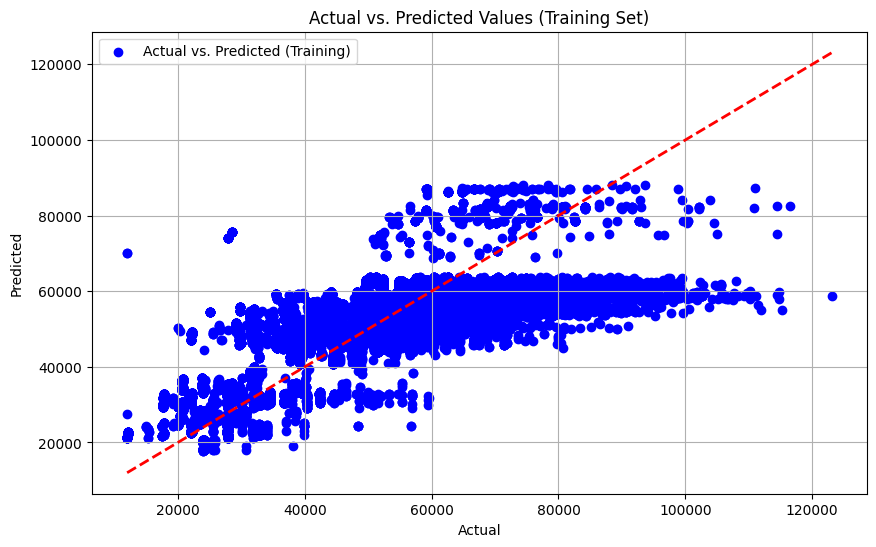

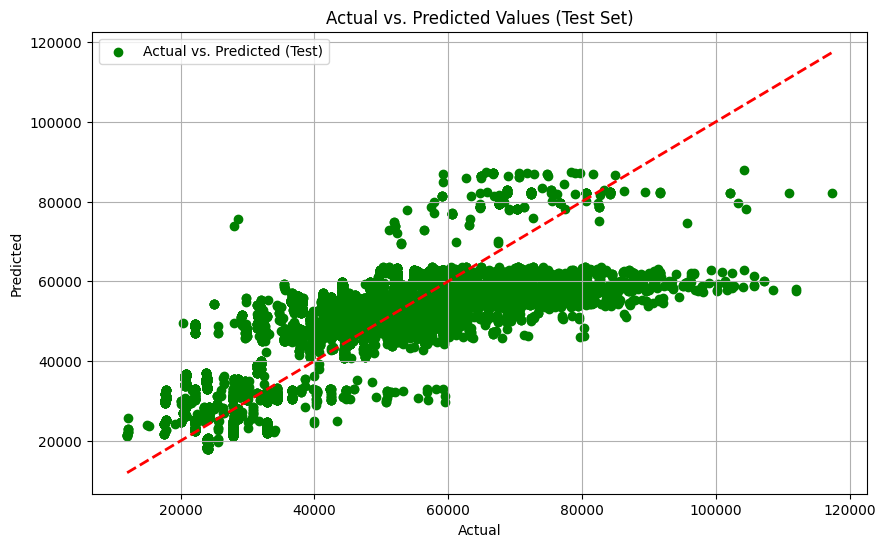

In [59]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc
# Assuming 'df' contains your features and target variable
X = df.drop(columns=['price'])  # Replace 'target_column' with the name of your target column
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE and RMSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train:.2f}")
print(f"R-squared on Training Set: {r2_train:.2f}")
print()
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test:.2f}")
print(f"R-squared on Test Set: {r2_test:.2f}")

Mean Squared Error (MSE) on Training Set: 17115981.52
Root Mean Squared Error (RMSE) on Training Set: 4137.15
R-squared on Training Set: 0.90

Mean Squared Error (MSE) on Test Set: 20255557.36
Root Mean Squared Error (RMSE) on Test Set: 4500.62
R-squared on Test Set: 0.88


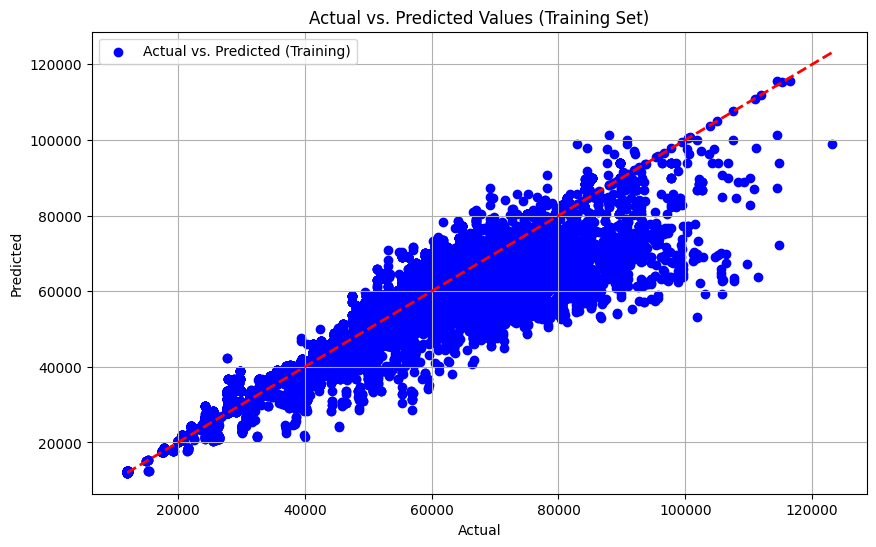

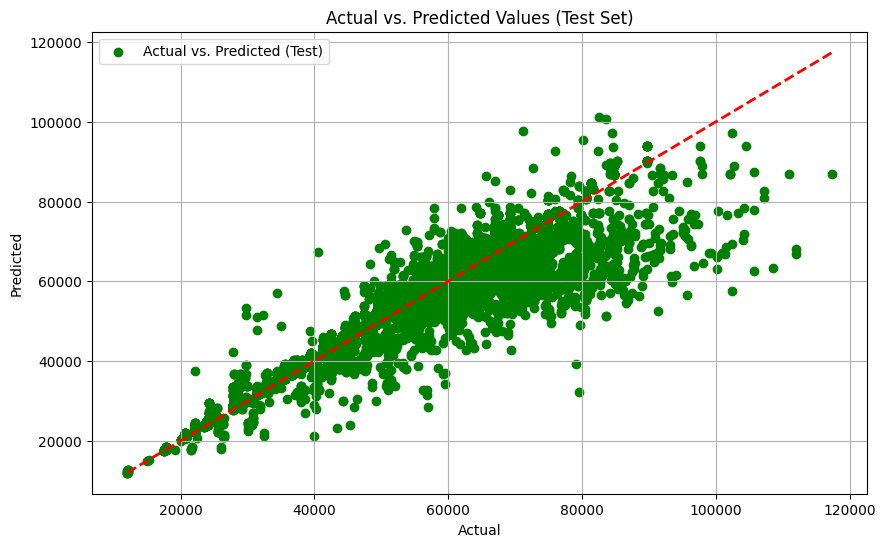

In [61]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error on Training Set: 0.01
Root Mean Squared Error on Training Set: 0.10
Mean Squared Error on Test Set: 0.06
Root Mean Squared Error on Test Set: 0.24
R-squared on Training Set: 0.98
R-squared on Test Set: 0.92


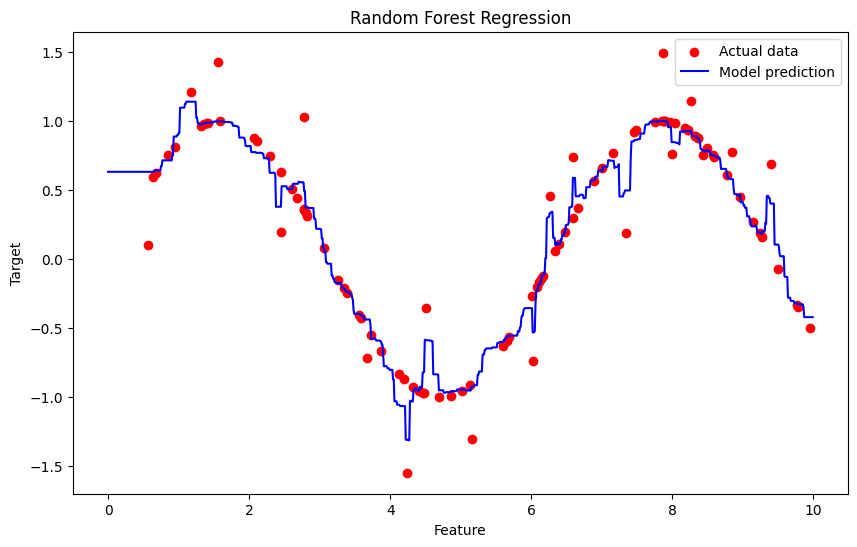

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example data: we will create some synthetic data for demonstration
# Features (X) and target (y)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel()

# Adding noise to the target
y[::5] += 1.5 * (0.5 - np.random.rand(20))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Mean Squared Error on Training Set: {mse_train:.2f}")
print(f"Root Mean Squared Error on Training Set: {rmse_train:.2f}")
print(f"Mean Squared Error on Test Set: {mse_test:.2f}")
print(f"Root Mean Squared Error on Test Set: {rmse_test:.2f}")

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared on Training Set: {r2_train:.2f}")
print(f"R-squared on Test Set: {r2_test:.2f}")

# Visualize the Random Forest Regression results
X_grid = np.arange(0.0, 10.0, 0.01).reshape(-1, 1)
y_grid_pred = model.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [67]:
'''from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Example data: we will create some synthetic data for demonstration
# Features (X) and target (y)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel()

# Adding noise to the target
y[::5] += 1.5 * (0.5 - np.random.rand(20))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

# Evaluate Ridge model
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

# Evaluate Lasso model
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

print("Ridge Regression:")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train_ridge:.2f}")
print(f"R-squared on Training Set: {r2_train_ridge:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test_ridge:.2f}")
print(f"R-squared on Test Set: {r2_test_ridge:.2f}")

print("\nLasso Regression:")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train_lasso:.2f}")
print(f"R-squared on Training Set: {r2_train_lasso:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test_lasso:.2f}")
print(f"R-squared on Test Set: {r2_test_lasso:.2f}")

# Plotting Ridge Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_ridge, color='blue', label='Training data')
plt.scatter(y_test, y_pred_test_ridge, color='red', label='Test data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='gray', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')
plt.legend()

# Plotting Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train_lasso, color='blue', label='Training data')
plt.scatter(y_test, y_pred_test_lasso, color='red', label='Test data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='gray', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')
plt.legend()

plt.tight_layout()
plt.show()'''

Ridge Regression:
Mean Squared Error (MSE) on Training Set: 0.38
Root Mean Squared Error (RMSE) on Training Set: 0.62
R-squared on Training Set: 0.05
Mean Squared Error (MSE) on Test Set: 0.60
Root Mean Squared Error (RMSE) on Test Set: 0.77
R-squared on Test Set: -0.18

Lasso Regression:
Mean Squared Error (MSE) on Training Set: 0.39
Root Mean Squared Error (RMSE) on Training Set: 0.62
R-squared on Training Set: 0.05
Mean Squared Error (MSE) on Test Set: 0.58
Root Mean Squared Error (RMSE) on Test Set: 0.76
R-squared on Test Set: -0.15


In [69]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Example data: we will create some synthetic data for demonstration
# Features (X) and target (y)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel()

# Adding noise to the target
y[::5] += 1.5 * (0.5 - np.random.rand(20))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Machine (SVM) regression model
svm_model = SVR(kernel='rbf')  # You can specify different kernels like 'linear', 'poly', 'rbf', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Evaluate the model
mse_train_svm = mean_squared_error(y_train, y_pred_train_svm)
mse_test_svm = mean_squared_error(y_test, y_pred_test_svm)
rmse_train_svm = np.sqrt(mse_train_svm)
rmse_test_svm = np.sqrt(mse_test_svm)
r2_train_svm = r2_score(y_train, y_pred_train_svm)
r2_test_svm = r2_score(y_test, y_pred_test_svm)

print("Support Vector Machine (SVM) Regression:")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train_svm:.2f}")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train_svm:.2f}")
print(f"R-squared on Training Set: {r2_train_svm:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test_svm:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test_svm:.2f}")
print(f"R-squared on Test Set: {r2_test_svm:.2f}")

Support Vector Machine (SVM) Regression:
Mean Squared Error (MSE) on Training Set: 0.06
Root Mean Squared Error (RMSE) on Training Set: 0.24
R-squared on Training Set: 0.87
Mean Squared Error (MSE) on Test Set: 0.03
Root Mean Squared Error (RMSE) on Test Set: 0.18
R-squared on Test Set: 0.93
